<a href="https://colab.research.google.com/github/jungmin0710/K-digital-PythonDeepLearning/blob/main/DNN_mnist_Categorical_Classification_Overfitting_realfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST - Categorical Classification
* 다중분류 + Overfitting Issue
* 여러 방법을 섞어 overfitting 줄이기 수행


In [ ]:
import warnings
warnings.filterwarnings('ignore')

* import Tensorflow

In [ ]:
import tensorflow as tf

tf.__version__ 

'2.4.1'

* GPU 설정 확인

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

* Import Keras

In [ ]:
import keras
keras.__version__

'2.4.3'

## 1.MNIST Data_Set Load & Review
### 1)Load MNIST_Data_Set

In [ ]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

* Train_Data Information

In [ ]:
print(len(X_train))
print(X_train.shape)
print(len(y_train))
print(y_train[0:5])

60000
(60000, 28, 28)
60000
[5 0 4 1 9]


* Test_Data Information

In [ ]:
print(len(X_test))
print(X_test.shape)
print(len(y_test))
print(y_test[0:5])

10000
(10000, 28, 28)
10000
[7 2 1 0 4]


### 2)Visualization

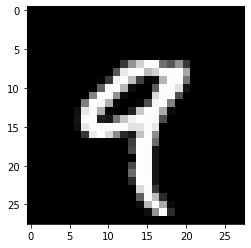

In [ ]:
import matplotlib.pyplot as plt

digit = X_train[4]
plt.imshow(digit, cmap = 'gray')
plt.show()

In [ ]:
import numpy as np

np.set_printoptions(linewidth = 150)

print(X_train[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 189 210 252 252 25

## 2.Data Preprocessing
### 1)Reshape and Normalization
* reshape
  * (60000, 28, 28) to (60000, 784)

In [ ]:
#한줄로 쭉 펴준다
X_train = X_train.reshape((60000, 28 * 28))
X_test = X_test.reshape((10000, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

* Normalization

In [ ]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

print(X_train[4])

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

### 2)One Hot Encoding

In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


## 3.MNIST Keras Modeling
### 1)Model Define
* 모델 신경망 구조 정의
  * 2개의 Hidden Layers & 768개의 Nodes
  * 복잡한 Model Capacity로 인한 Overfitting


In [ ]:
from keras import models
from keras import layers

mnist = models.Sequential()
mnist.add(layers.Dense(512, input_shape = (28 * 28,)))
mnist.add(layers.Dropout(0.5))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dense(256))
mnist.add(layers.Dropout(0.2))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dense(10, activation = 'softmax'))

* 모델 구조 확인

In [ ]:
mnist.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)              

### 2)Model Compile
* 모델 학습방법 설정

In [ ]:
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

### 3)Model Fit
* 약 3분

In [ ]:
%%time

Hist_mnist = mnist.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 0.4961 - accuracy: 0.8476 - val_loss: 0.1404 - val_accuracy: 0.9575
Epoch 2/100
375/375 [==============================] - 1s 4ms/step - loss: 0.1729 - accuracy: 0.9470 - val_loss: 0.1100 - val_accuracy: 0.9663
Epoch 3/100
375/375 [==============================] - 1s 4ms/step - loss: 0.1351 - accuracy: 0.9578 - val_loss: 0.1202 - val_accuracy: 0.9625
Epoch 4/100
375/375 [==============================] - 1s 4ms/step - loss: 0.1173 - accuracy: 0.9649 - val_loss: 0.0976 - val_accuracy: 0.9707
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0988 - accuracy: 0.9693 - val_loss: 0.0926 - val_accuracy: 0.9723
Epoch 6/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0927 - accuracy: 0.9714 - val_loss: 0.0986 - val_accuracy: 0.9710
Epoch 7/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0857 - accuracy: 0.9732 - val_loss: 0.0915 - val_accuracy: 0.9739

### 4)학습 결과 시각화 - Overfitting
* Loss Visualization

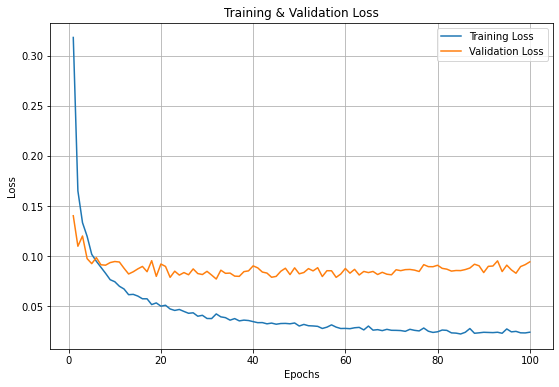

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize = (9,6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
#plt.ylim(0,0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

## 5)Model Evaluate
* Loss & Accuracy

In [ ]:
loss, accuracy = mnist.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

#두개 섞으니 성능은 더욱 내려가지만, Loss는 더욱 줄었다.

313/313 [==============================] - 1s 2ms/step - loss: 0.1160 - accuracy: 0.9696
Loss = 0.11599
Accuracy = 0.96960


### 6)Model Predict
* Probability

In [ ]:
np.set_printoptions(suppress=True, precision=9)

print(mnist.predict(X_test[:1,:]))

[[0.          0.000000001 0.000000032 0.000006696 0.          0.000000023 0.          0.99999297  0.          0.000000341]]


* Class

In [ ]:
print(mnist.predict_classes(X_test[:1, :]))

[7]


본 내용은 2021/03/19(금)에 학습한 내용입니다.